In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
from natsort import natsorted

# Etude LR

In [124]:
loss_dat = natsorted(glob.glob('./lr/*/*.dat'))

In [125]:
loss_dat

['./lr/lr0/output.dat',
 './lr/lr1/output.dat',
 './lr/lr2/output.dat',
 './lr/lr3/output.dat',
 './lr/lr4/output.dat',
 './lr/lr5/output.dat',
 './lr/lr6/output.dat']

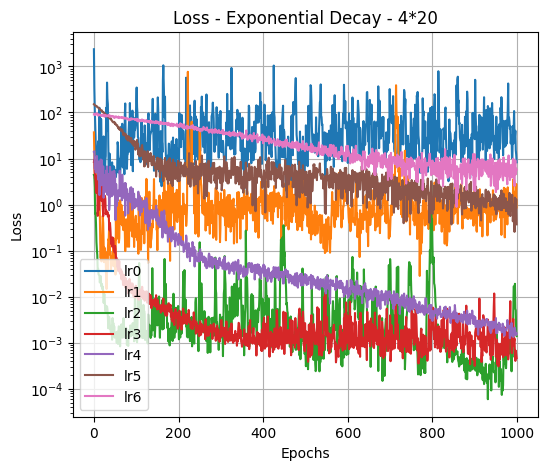

In [126]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yscale('log')
plt.title("Loss - Exponential Decay - 4*20")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
for i in range(len(loss_dat)):    
    loss = np.loadtxt(loss_dat[i],unpack = True)

    # Plot
    ax.plot(loss[0],loss[1])
    ax.legend(['lr0','lr1','lr2','lr3','lr4','lr5','lr6'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [106]:
time_dat= np.loadtxt('./lr/lr_time.txt',unpack=True)

In [107]:
time_dat[1]

array([93.8175, 92.9418, 88.2566, 89.0212, 87.4527, 90.708 , 93.1479])

(80.0, 100.0)

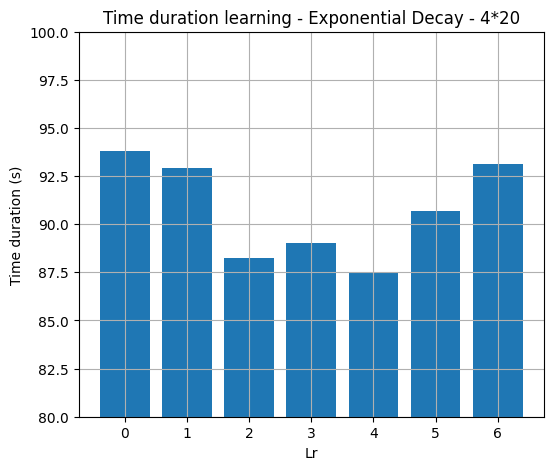

In [108]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()

ax.bar(time_dat[0],time_dat[1])

plt.title("Time duration learning - Exponential Decay - 4*20")
ax.set_xlabel('Lr')
ax.set_ylabel('Time duration (s)')
ax.set_ylim(80, 100)

In [83]:
def Kflowinit(X):
    Y =   np.exp(-X*X)
    return Y

In [84]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)
Input = X.reshape(Nx,-1)
Init = Kflowinit(X)
Init = Init.reshape(Nx,-1)    

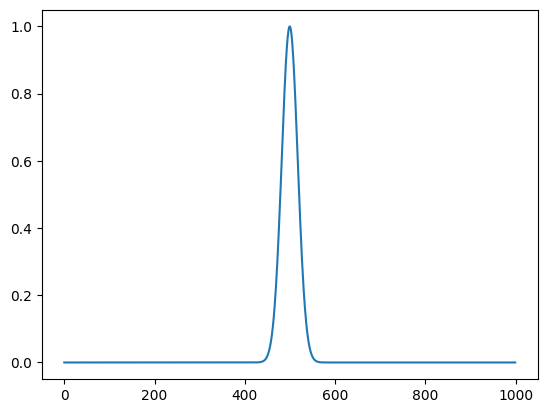

In [86]:
plt.plot(Init)

In [159]:
x_dat = natsorted(glob.glob('./lr/*/X'))
u_dat = natsorted(glob.glob('./lr/*/U'))
v_dat = natsorted(glob.glob('./lr/*/V'))

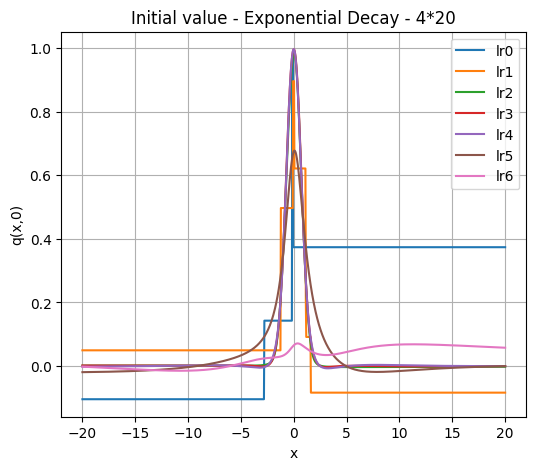

In [160]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
plt.title("Initial value - Exponential Decay - 4*20")
ax.set_xlabel('x')
ax.set_ylabel('q(x,0)')
for i in range(len(x_dat)):    
    u = np.load(u_dat[i],allow_pickle=True)
    v = np.load(v_dat[i],allow_pickle=True)
    x = np.load(x_dat[i],allow_pickle=True)
    
    # Plot
    ax.plot(x,v)
    ax.legend(['lr0','lr1','lr2','lr3','lr4','lr5','lr6'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [110]:
for i in range(len(u_dat)):
    u = np.load(u_dat[i],allow_pickle=True)
    u = np.vstack(u)
    err_u = u-Init
    err_norm_u = np.linalg.norm(err_u,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print()
    v = np.load(v_dat[i],allow_pickle=True)
    v = np.vstack(v)
    err_v = v-Init
    err_norm_v = np.linalg.norm(err_v,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print(err_norm_u,err_norm_v)



11.952707 9.075197

3.010246 2.9164567

0.05548932 0.1296358

0.044726443 0.05728534

0.092790104 0.09665518

2.1604278 2.0768638

5.4207172 5.314669


# Etude activation functions

In [127]:
loss_dat = natsorted(glob.glob('./activation_function/*/*.dat'))

In [128]:
loss_dat

['./activation_function/relu/output.dat',
 './activation_function/sigmoid/output.dat',
 './activation_function/softplus/output.dat',
 './activation_function/tanh/output.dat']

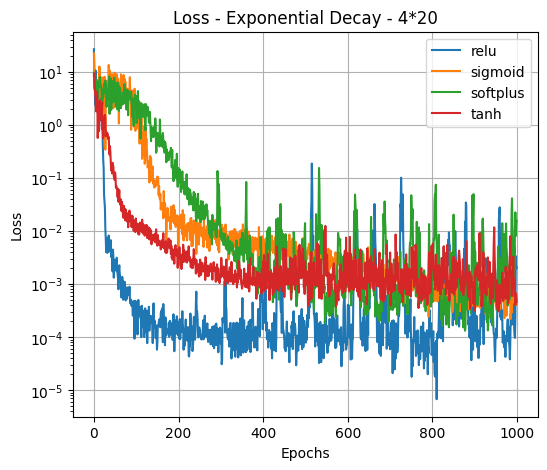

In [129]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
ax.set_yscale('log')
plt.title("Loss - Exponential Decay - 4*20")
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
for i in range(len(loss_dat)):    
    loss = np.loadtxt(loss_dat[i],unpack = True)

    # Plot
    ax.plot(loss[0],loss[1])
    ax.legend(['relu','sigmoid','softplus','tanh'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [147]:
time_dat= np.loadtxt('./activation_function/activation.txt',unpack=True,usecols=1)

In [148]:
time_dat

array([89.0212, 86.8383, 79.2938, 99.0356])

(75.0, 100.0)

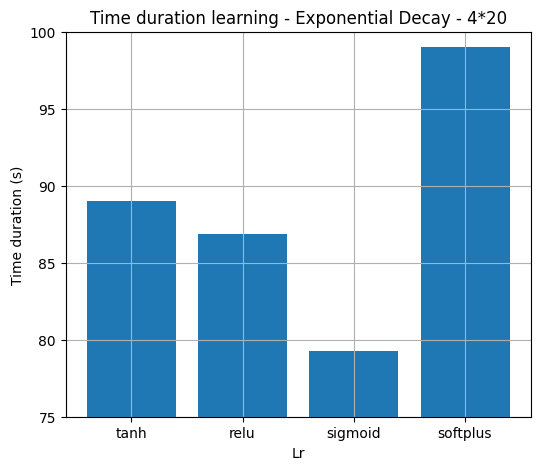

In [152]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()

ax.bar(['tanh','relu','sigmoid','softplus'],time_dat)

plt.title("Time duration learning - Exponential Decay - 4*20")
ax.set_xlabel('Lr')
ax.set_ylabel('Time duration (s)')
ax.set_ylim(75, 100)

In [153]:
def Kflowinit(X):
    Y =   np.exp(-X*X)
    return Y

In [154]:
Nx = 1000
x1 = -20.0
x2 = 20
X  = np.linspace(x1,x2,num=Nx, dtype=np.float32)
Input = X.reshape(Nx,-1)
Init = Kflowinit(X)
Init = Init.reshape(Nx,-1)    

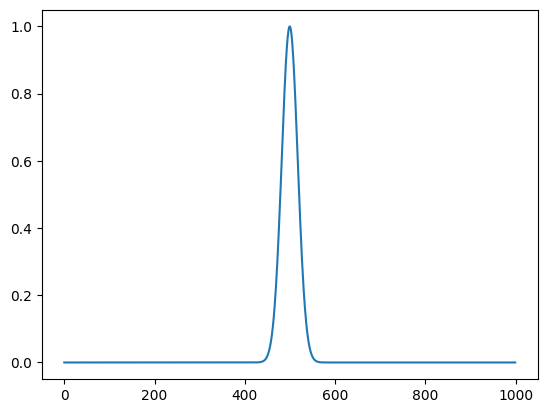

In [155]:
plt.plot(Init)

In [162]:
x_dat = natsorted(glob.glob('./activation_function/*/X'))
u_dat = natsorted(glob.glob('./activation_function/*/U'))
v_dat = natsorted(glob.glob('./activation_function/*/V'))

In [163]:
u_dat

['./activation_function/relu/U',
 './activation_function/sigmoid/U',
 './activation_function/softplus/U',
 './activation_function/tanh/U']

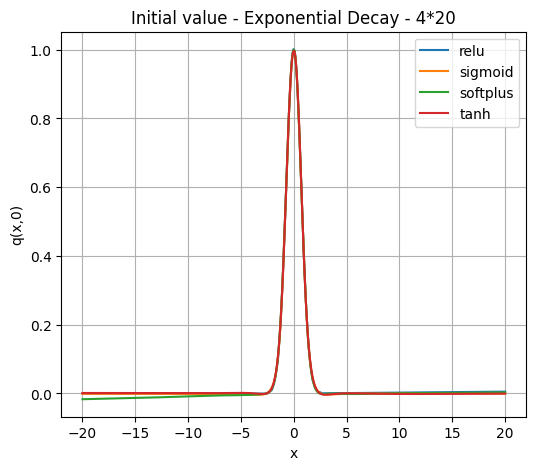

In [165]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
plt.title("Initial value - Exponential Decay - 4*20")
ax.set_xlabel('x')
ax.set_ylabel('q(x,0)')
for i in range(len(x_dat)):    
    u = np.load(u_dat[i],allow_pickle=True)
    v = np.load(v_dat[i],allow_pickle=True)
    x = np.load(x_dat[i],allow_pickle=True)
    
    # Plot
    ax.plot(x,v)
    ax.legend(['relu','sigmoid','softplus','tanh'])

    # Labels
    
    
    # Save
    #plt.savefig(f'q_{i}.png')
    #plt.cla()

In [166]:
for i in range(len(u_dat)):
    u = np.load(u_dat[i],allow_pickle=True)
    u = np.vstack(u)
    err_u = u-Init
    err_norm_u = np.linalg.norm(err_u,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print()
    v = np.load(v_dat[i],allow_pickle=True)
    v = np.vstack(v)
    err_v = v-Init
    err_norm_v = np.linalg.norm(err_v,ord=2) # 'fro' : Frobenius, 2 : ordre 2
    print(err_norm_u,err_norm_v)


0.040824592 0.06982185

0.047076665 0.04961445

0.2313616 0.22857586

0.044726443 0.05728534


In [178]:
erreur= np.loadtxt('./activation_function/activation.txt',unpack=True,usecols=[2,3])

In [182]:
erreur[1]

array([0.05728534, 0.06982185, 0.04961445, 0.22857586])

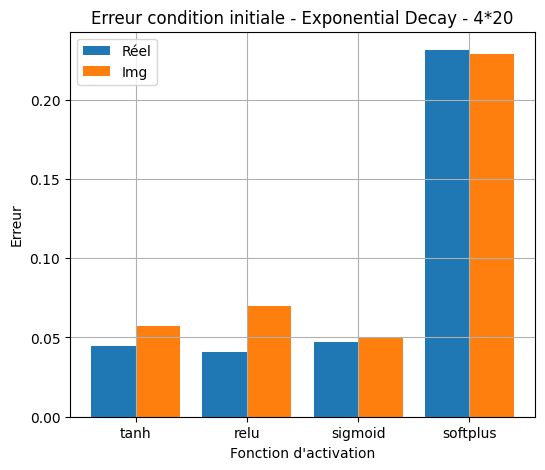

In [201]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
ax.grid()
X=['tanh','relu','sigmoid','softplus']
X_axis = np.arange(len(X)) 

ax.bar(X_axis-0.2,erreur[0],0.4,label = 'Réel')
ax.bar(X_axis+0.2,erreur[1],0.4,label = 'Img')

plt.xticks(X_axis, X) 
plt.title("Erreur condition initiale - Exponential Decay - 4*20")
ax.set_xlabel("Fonction d'activation")
ax.set_ylabel('Erreur')
ax.legend()